Project:
The challenge of this project is to accurately predict the future closing value of the Nasdaq index across a given period of time in the future(2022_Jan-April). For this project I will employ Long Short Term Memory networks to predict the closing price of Nasdaq using a dataset of past prices

In [41]:
#Using LSTM to predict stock indices
#LSTMs are a variation of RNN architecture
#With thsese memory cells networks can effectively assosciate memories and
#input remote in time, hence suitable to grasp the structure of data
#dynamically overtime with prediction capacity.

In [42]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [51]:
#Load the data
from google.colab import files
files.upload()

Saving NAS100_1440.csv to NAS100_1440.csv


{'NAS100_1440.csv': b'Date,Time,Open,High,Low,Close,Volume\r\n2017.08.31,0:00,5946.8,5994.92,5938.8,5992.55,29869\r\n2017.09.01,0:00,5990.68,6016.92,5970.8,5984.3,37188\r\n2017.09.04,0:00,5953.3,5978.92,5943.42,5975.8,18439\r\n2017.09.05,0:00,5972.18,5981.42,5886.55,5937.68,61904\r\n2017.09.06,0:00,5939.05,5963.12,5906.05,5949.12,53414\r\n2017.09.07,0:00,5948.62,5978.88,5929,5966.62,51628\r\n2017.09.08,0:00,5966.5,5969,5905.25,5913,39156\r\n2017.09.11,0:00,5925.75,5989.88,5925.75,5981.88,32528\r\n2017.09.12,0:00,5978.88,6001.38,5964.88,5996.88,42303\r\n2017.09.13,0:00,5995.75,6001.88,5973.12,6000.38,32480\r\n2017.09.14,0:00,5996.38,5998.5,5959.38,5961.12,29632\r\n2017.09.15,0:00,5961.38,6010.62,5938.25,5989.5,36337\r\n2017.09.18,0:00,5993.32,6012.45,5962.08,5982.08,30059\r\n2017.09.19,0:00,5983.22,5999.22,5969.6,5987.85,32550\r\n2017.09.20,0:00,5990.1,5994.98,5925.22,5970.85,43779\r\n2017.09.21,0:00,5969.72,5974.35,5913.85,5937.72,39571\r\n2017.09.22,0:00,5937.98,5939.48,5905.48,5928.5

In [52]:
#Read the data
dataset=pd.read_csv('NAS100_1440.csv')
#Set the date as index
dataset=dataset.set_index(pd.DatetimeIndex(dataset['Date'].values))
#Show the data
dataset.tail()

,Date,Time,Open,High,Low,Close,Volume
2021-12-21,2021.12.21,0:00,15681.27,15993.2,15610.6,15981.0,236939
2021-12-22,2021.12.22,0:00,15981.70,16190.3,15890.1,16186.5,189316
2021-12-23,2021.12.23,0:00,16187.50,16360.4,16152.4,16306.8,136709
2021-12-27,2021.12.27,0:00,16338.80,16583.2,16309.4,16573.6,144262
2021-12-28,2021.12.28,0:00,16572.50,16659.6,16456.2,16513.7,169922


In [53]:
#Check missing values
dataset.isna().any()

Date      False
Time      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1117 entries, 2017-08-31 to 2021-12-28
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1117 non-null   object 
 1   Time    1117 non-null   object 
 2   Open    1117 non-null   float64
 3   High    1117 non-null   float64
 4   Low     1117 non-null   float64
 5   Close   1117 non-null   float64
 6   Volume  1117 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 69.8+ KB


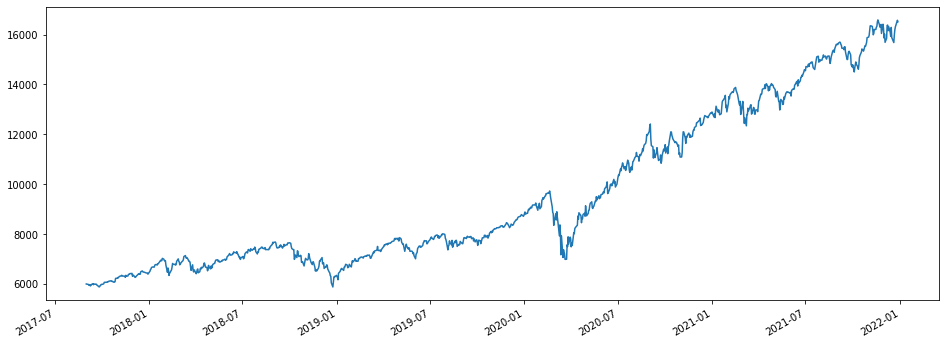

In [55]:
dataset['Close'].plot(figsize=(16,6))

In [57]:
#7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
2017-08-31,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN,NaN
2017-09-04,NaN,NaN,NaN,NaN,NaN
2017-09-05,NaN,NaN,NaN,NaN,NaN
2017-09-06,NaN,NaN,NaN,NaN,NaN
2017-09-07,NaN,NaN,NaN,NaN,NaN
2017-09-08,5959.590000,5983.311429,5925.695714,5959.867143,41656.857143
2017-09-11,5956.582857,5982.591429,5923.831429,5958.342857,42036.714286
2017-09-12,5954.897143,5980.371429,5922.985714,5960.140000,42767.428571
2017-09-13,5960.961429,5983.651429,5927.228571,5963.651429,44773.285714


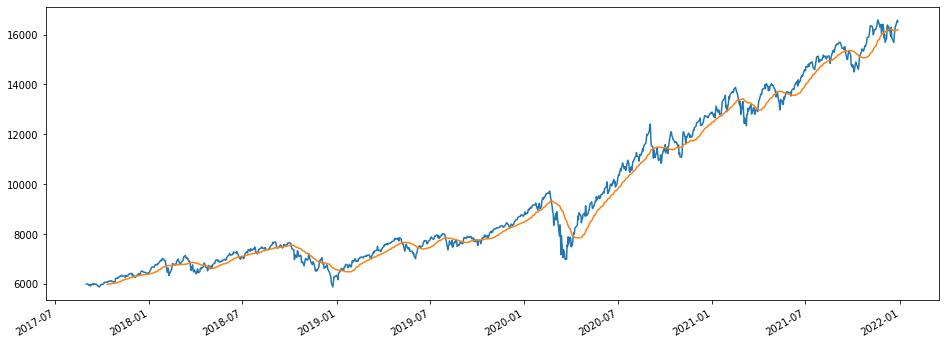

In [58]:
dataset['Close'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

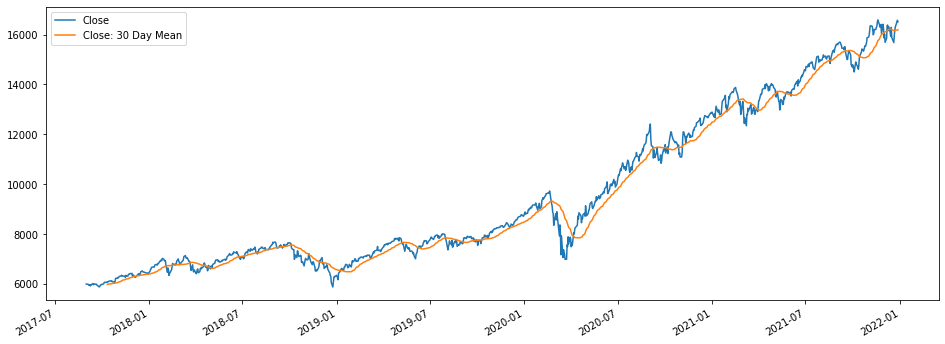

In [59]:
#Plot Close column vs 30 Day MA
dataset['Close: 30 Day Mean']=dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

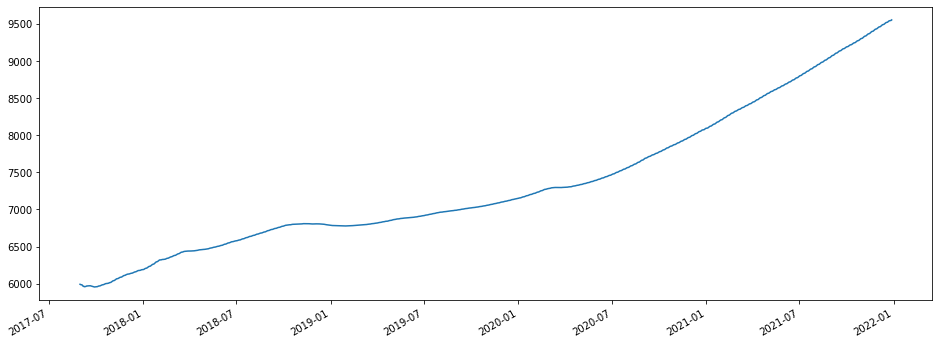

In [60]:
#Specify minimum number of periods per 30 days to 1
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [61]:
#Create dataframe of training set
training_set=dataset['Close']
training_set=pd.DataFrame(training_set)

Stage 2

In [62]:
#data cleaning
dataset.isna().any()

Date                  False
Time                  False
Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [63]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [65]:
#Creating a data structure with 60 timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,1117):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Stage 3(Feature Scaling)

In [66]:
#Part 2- Building the RNN

#Import Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [67]:
#Initialise the RNN
regressor=Sequential()

Stage 4(Training Neural Network)

In [68]:
#feed data to Neural Network and train for prediction assigning random 
#biases and weights

In [69]:
#Adding the first LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding the second LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#Adding 3rd LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#Adding 4th LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Adding output layer
regressor.add(Dense(units=1))

In [70]:
#Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')
#the optimzer used greatly affects how fast the algo converges to the min value
#Dropouts; used in making the neurons more robusts and hence allowing them to
#predict the trend without focusing on one neuron. Preventing Overfitting!!!

#fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32) #32 is a good
#range to start experimenting with, (use mutiples of 32..32,64 etc)

Epoch 1/100
34/34 [==============================] - 12s 124ms/step - loss: 0.0236
Epoch 2/100
34/34 [==============================] - 4s 123ms/step - loss: 0.0063
Epoch 3/100
34/34 [==============================] - 4s 123ms/step - loss: 0.0038
Epoch 4/100
34/34 [==============================] - 4s 123ms/step - loss: 0.0036
Epoch 5/100
34/34 [==============================] - 4s 122ms/step - loss: 0.0036
Epoch 6/100
34/34 [==============================] - 4s 125ms/step - loss: 0.0040
Epoch 7/100
34/34 [==============================] - 4s 124ms/step - loss: 0.0041
Epoch 8/100
34/34 [==============================] - 4s 126ms/step - loss: 0.0033
Epoch 9/100
34/34 [==============================] - 4s 126ms/step - loss: 0.0029
Epoch 10/100
34/34 [==============================] - 4s 127ms/step - loss: 0.0060
Epoch 11/100
34/34 [==============================] - 4s 125ms/step - loss: 0.0029
Epoch 12/100
34/34 [==============================] - 4s 126ms/step - loss: 0.0037
Epoch 13/100

Stage 5(Output generation)

In [78]:
#part 3- making predictions and visualizing results

#Get the stock price of 2022
from google.colab import files
files.upload()

Saving NAS100_2022_test.csv to NAS100_2022_test.csv


{'NAS100_2022_test.csv': b'Date,Time,Open,High,Low,Close,Volume\r\n2021.12.29,0:00,16518.3,16565.7,16389.6,16481.7,164183\r\n2021.12.30,0:00,16493.1,16569,16416.7,16435.9,137773\r\n2021.12.31,0:00,16444.3,16468.7,16316,16333.6,146969\r\n2022.01.03,0:00,16392,16515,16293.8,16501.9,174226\r\n2022.01.04,0:00,16505.5,16568.9,16146.7,16266.9,206312\r\n2022.01.05,0:00,16268.6,16274.7,15760.6,15760.6,235497\r\n2022.01.06,0:00,15772.2,15902.2,15606.7,15799.7,301576\r\n2022.01.07,0:00,15810.4,15861.9,15521,15582.1,256146\r\n2022.01.10,0:00,15593.4,15678.7,15162.9,15626,278075\r\n2022.01.11,0:00,15630.9,15849.2,15487.8,15834.7,265096\r\n2022.01.12,0:00,15836.9,16019.4,15772.7,15903.1,249333\r\n2022.01.13,0:00,15905.6,15990.2,15469.4,15511.5,248548\r\n2022.01.14,0:00,15517.5,15628.9,15322.5,15628.1,306774\r\n2022.01.17,0:00,15649.1,15649.1,15518,15568.2,105606\r\n2022.01.18,0:00,15590.4,15612.3,15183.7,15252,301560\r\n2022.01.19,0:00,15250.6,15383.1,15023.8,15046.3,313325\r\n2022.01.20,0:00,15054

In [124]:
#Read the data
dataset_test=pd.read_csv('NAS100_2022_test.csv')
#Set the date as index
dataset_test=dataset_test.set_index(pd.DatetimeIndex(dataset_test['Date'].values))

real_stock_price=dataset_test.iloc[:, 5:6].values
#Show the data
dataset_test.head()

,Date,Time,Open,High,Low,Close,Volume
2021-12-29,2021.12.29,0:00,16518.3,16565.7,16389.6,16481.7,164183
2021-12-30,2021.12.30,0:00,16493.1,16569.0,16416.7,16435.9,137773
2021-12-31,2021.12.31,0:00,16444.3,16468.7,16316.0,16333.6,146969
2022-01-03,2022.01.03,0:00,16392.0,16515.0,16293.8,16501.9,174226
2022-01-04,2022.01.04,0:00,16505.5,16568.9,16146.7,16266.9,206312


In [88]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2021-12-29 to 2022-04-14
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    77 non-null     object 
 1   Time    77 non-null     object 
 2   Open    77 non-null     float64
 3   High    77 non-null     float64
 4   Low     77 non-null     float64
 5   Close   77 non-null     float64
 6   Volume  77 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 4.8+ KB


In [89]:
test_set=dataset_test['Close']
test_set=pd.DataFrame(test_set)

In [90]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2021-12-29 to 2022-04-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   77 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [149]:
#Getting predicted stock price of 2022
dataset_total=pd.concat((dataset['Close'], dataset_test['Close']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,137):
  X_test.append(inputs[i-60:i, 0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [150]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       77 non-null     float32
dtypes: float32(1)
memory usage: 436.0 bytes


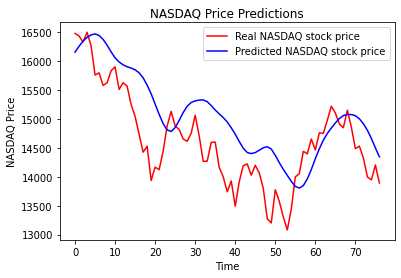

In [151]:
#Visualising the results
plt.plot(real_stock_price, color='red', label='Real NASDAQ stock price')
plt.plot(predicted_stock_price, color='blue', label='Predicted NASDAQ stock price')
plt.title('NASDAQ Price Predictions')
plt.xlabel('Time')
plt.ylabel('NASDAQ Price')
plt.legend()
plt.show()